In [19]:
import fitz
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from pykospacing import Spacing
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [20]:
path = './장미와 찔레.pdf'
doc = fitz.open(path)
spacing = Spacing()
okt = Okt()

In [21]:
doc_text = ""
# 시작 페이지와 끝 페이지 지정 (예: 7페이지부터 31페이지까지)
start_page = 6
end_page = 30

# 범위 내의 페이지에서 텍스트 추출
for page_number in range(start_page, end_page + 1):
    page = doc.load_page(page_number)  # 페이지 로드
    text = page.get_text("text")  # 페이지에서 텍스트 추출
    text = spacing(text)
    doc_text+=text

In [22]:
# 50글자씩 자르기
extracted_text = [doc_text[i:i+100] for i in range(0, len(doc_text), 100)]

In [23]:
nouns = []
for s in extracted_text:
    # 명사 추출
    words = okt.nouns(s)
    
    # 2글자 이상과 숫자를 제외하고 1글자인 명사만 필터링
    filtered_words = [word for word in words if len(word) >= 2 and not word.isdigit()]
    
    # 필터링된 명사를 nouns 리스트에 추가
    nouns.append(filtered_words)

In [24]:
target = [' '.join(t) for t in nouns]

In [25]:
tfidf = TfidfVectorizer()

In [26]:
book_tfidf = tfidf.fit_transform(target).toarray()

In [27]:
col = tfidf.get_feature_names_out()

In [28]:
book_tfidf_df = pd.DataFrame(book_tfidf, columns=col)

In [29]:
book_tfidf_df

,가끔,가나,가늠,가능성,가든,가르침,가면,가슴,가신,가야,...,회사원,회상,회의,회장,효과,훈련,휴대폰,흥미,희망,힐끔
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.277471,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380035,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


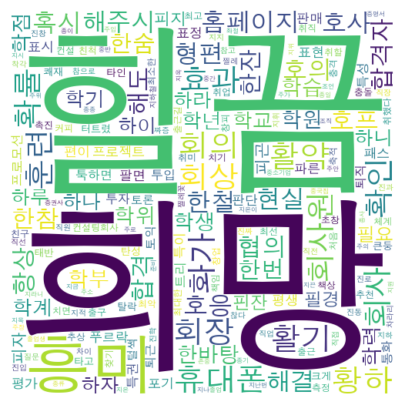

In [30]:
font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(width=500, height=500, background_color='white',font_path=font_path).generate_from_frequencies(tfidf.vocabulary_)

# 시각화2
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()